# Chestnut Manju Problem

## 1. Goal
This assignment requires learners to:
- Apply basic programming skills to exponential growth problems
- Gain experience creating programs without guidance
- Solving famous problems programmatically

## 2. Problem Statement
A fictional gadget doubles the quantity every **5 minutes**. In this scenario, chestnut buns (manju) double in total volume every step.
This assignment requires modeling the doubling process, computing how long it takes to fill the **Solar System**, and generalizing the approach so that other spaces can be evaluated.

## 3. Assumptions and Formulas
**The volume of a sphere;** the bun and solar system, is given by the formula, 4/3 pi r^3
**Chestnut bun radius**: approximately, one bun as a sphere has a radius of 5 cm

**Solar System volume**: approximately, the radius of the solar system is 4.5 billion kilometres =  4.5 * 10^12 m

**Growth rule**: total volume doubles every 5 minutes.

In [ ]:
import math

# Parameters
r_bun_m = 0.05             # bun radius [m]
R_solar_m = 4.5e12         # Solar System radius approximation [m]
doubling_minutes = 5       # period of doubling [minutes]

# Volumes
V_bun = (4/3)*math.pi*(r_bun_m**3)
V_solar = (4/3)*math.pi*(R_solar_m**3)

print(f"One bun volume: {V_bun:.6e} m^3")
print(f"Approximate Solar System volume: {V_solar:.6e} m^3")

One bun volume: 5.235988e-04 m^3
Approximate Solar System volume: 3.817035e+38 m^3


## 4. Question 1 - Time to Fill the Solar System
This assignment requires computing the number of **doubling steps** and **minutes** until total bun volume reaches or exceeds the Solar System volume.
Let's use a while-loop to iterate until the target is met.

In [ ]:
# While-loop simulation starting from one bun
total_volume = V_bun
steps = 0

while total_volume < V_solar:
    total_volume *= 2 # doubles
    steps += 1

minutes_to_fill = steps * doubling_minutes
hours_to_fill = minutes_to_fill / 60
days_to_fill = hours_to_fill / 24

print(f"Doubling steps needed: {steps}")
print(f"Time to fill: {minutes_to_fill:,} minutes ({hours_to_fill:,.2f} hours, {days_to_fill:,.2f} days")

Doubling steps needed: 140
Time to fill: 700 minutes (11.67 hours, 0.49 days


## 5. Question 2 - General Purpose Function
A reusable function to compute time to fill (in minutes) for any **initial volume**, **target volume**, and **doubling interval**.

In [ ]:
def doubling_time_to_fill(initial_volume, target_volume, doubling_minutes=5):
    """Return the minutes required for a doubling process to reach/exceed target.
    The process starts at `initial_volume` and doubles every `doubling_minutes` minutes.
    """
    if initial_volume <= 0:
        raise ValueError("initial_volume must be positive") # Checks sort of?
    if target_volume <= 0:
        raise ValueError("target_volume must be positive")
    if target_volume <= initial_volume:
        return 0

    total = initial_volume
    steps = 0
    while total < target_volume:
        total *= 2
        steps += 1
    return steps * doubling_minutes

# Example reuse: Tokyo Dome (approximate interior volume 1,240,000 m^3)
minutes_tokyo_dome = doubling_time_to_fill(V_bun, 1.24e6, doubling_minutes)
print(f"Minutes to fill Tokyo Dome: {minutes_tokyo_dome:,} minutes (Approximately {minutes_tokyo_dome/60:,.2f} hours)" )

Minutes to fill Tokyo Dome: 160 minutes (Approximately 2.67 hours)


## 6. Visualization - Total Volume Over Time
Plot of total bun volume over time to illustrate exponential growth.
The y-axis uses a logarithmic scale.

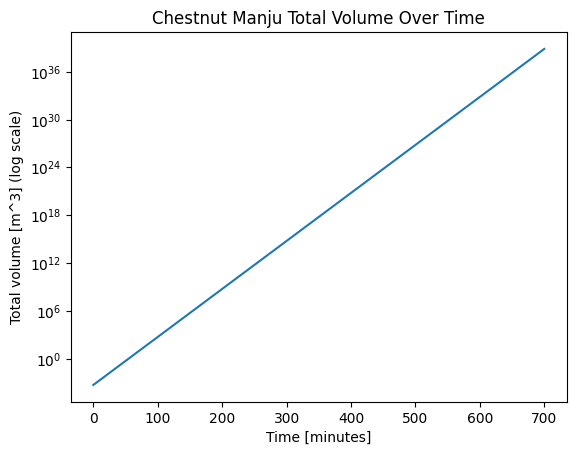

In [ ]:
import matplotlib.pyplot as plt

# Build time series up to 'steps' from the Solar System result
volumes = []
times_min = []

v = V_bun
for k in range(steps + 1):  # include starting point
    volumes.append(v)
    times_min.append(k * doubling_minutes)
    v *= 2

plt.title("Chestnut Manju Total Volume Over Time")
plt.xlabel("Time [minutes]")
plt.ylabel("Total volume [m^3] (log scale)")
plt.yscale("log")
plt.plot(times_min, volumes)
plt.show()